# **Import Library**

In [ ]:
import string
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
!pip install wordcloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report, accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Read Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/Jurnal/5000_data.csv",sep=';', encoding='utf-8')
data = data.drop(columns=['user'], axis=1)
data.head()

,Comment,Label
0,Wong cilik yang mba...,NON-CYBERBULYING
1,Aku wong cilik tapi pake sepatu bu,NON-CYBERBULYING
2,Ahahaha. Kontlo. Niatan mau merakyat malah ga...,CYBERBULLYING
3,Mantaab mbak puan..maju trus..smoga jadi pres...,NON-CYBERBULYING
4,"Wes tah puan, rekam jejakmu ora genah blas ðŸ‘Ž",CYBERBULLYING


# **Preprocessing**

In [ ]:
def casefolding(text):
    text = text.lower()
    return text

data['Comment'] = data['Comment'].apply(casefolding)
data.head()

,Comment,Label
0,wong cilik yang mba...,NON-CYBERBULYING
1,aku wong cilik tapi pake sepatu bu,NON-CYBERBULYING
2,ahahaha. kontlo. niatan mau merakyat malah ga...,CYBERBULLYING
3,mantaab mbak puan..maju trus..smoga jadi pres...,NON-CYBERBULYING
4,"wes tah puan, rekam jejakmu ora genah blas ðÿ‘ž",CYBERBULLYING


In [ ]:
def cleaning(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    return text

data['Comment'] = data['Comment'].apply(cleaning)
data.head()

,Comment,Label
0,wong cilik yang mba,NON-CYBERBULYING
1,aku wong cilik tapi pake sepatu bu,NON-CYBERBULYING
2,ahahaha kontlo niatan mau merakyat malah ga...,CYBERBULLYING
3,mantaab mbak puan maju trus smoga jadi pres...,NON-CYBERBULYING
4,wes tah puan rekam jejakmu ora genah blas,CYBERBULLYING


In [ ]:
def token(text):
    text = text.split()
    return text
  
data['Comment'] = data['Comment'].apply(token)
data

,Comment,Label
0,"[wong, cilik, yang, mba]",NON-CYBERBULYING
1,"[aku, wong, cilik, tapi, pake, sepatu, bu]",NON-CYBERBULYING
2,"[ahahaha, kontlo, niatan, mau, merakyat, malah...",CYBERBULLYING
3,"[mantaab, mbak, puan, maju, trus, smoga, jadi,...",NON-CYBERBULYING
4,"[wes, tah, puan, rekam, jejakmu, ora, genah, b...",CYBERBULLYING
...,...,...
4995,"[sedng, kritik, kenaikan, eeeh, micnya, dimati...",CYBERBULLYING
4996,"[mana, bukti, kebijakan, untuk, wong, cilik, s...",NON-CYBERBULYING
4997,"[kenapa, warung, mane, warungnye]",NON-CYBERBULYING
4998,"[lambemu, bosok, belatung]",CYBERBULLYING


In [ ]:
def stopword_removal(text):
    stopword = stopwords.words('indonesian')
    text = [word for word in text if word not in stopword]
    return text
  
data['Comment'] = data['Comment'].apply(stopword_removal)
data

,Comment,Label
0,"[cilik, mba]",NON-CYBERBULYING
1,"[cilik, pake, sepatu, bu]",NON-CYBERBULYING
2,"[ahahaha, kontlo, niatan, merakyat, gak, ngerti]",CYBERBULLYING
3,"[mantaab, mbak, puan, maju, trus, smoga, presi...",NON-CYBERBULYING
4,"[wes, tah, puan, rekam, jejakmu, ora, genah, b...",CYBERBULLYING
...,...,...
4995,"[sedng, kritik, kenaikan, eeeh, micnya, dimati...",CYBERBULLYING
4996,"[bukti, kebijakan, cilik, blt, yg, dl, cela, e...",NON-CYBERBULYING
4997,"[warung, mane, warungnye]",NON-CYBERBULYING
4998,"[lambemu, bosok, belatung]",CYBERBULLYING


In [ ]:
cyberbullying_clean = data
cyberbullying_clean.dropna()

,Comment,Label
0,"[cilik, mba]",NON-CYBERBULYING
1,"[cilik, pake, sepatu, bu]",NON-CYBERBULYING
2,"[ahahaha, kontlo, niatan, merakyat, gak, ngerti]",CYBERBULLYING
3,"[mantaab, mbak, puan, maju, trus, smoga, presi...",NON-CYBERBULYING
4,"[wes, tah, puan, rekam, jejakmu, ora, genah, b...",CYBERBULLYING
...,...,...
4995,"[sedng, kritik, kenaikan, eeeh, micnya, dimati...",CYBERBULLYING
4996,"[bukti, kebijakan, cilik, blt, yg, dl, cela, e...",NON-CYBERBULYING
4997,"[warung, mane, warungnye]",NON-CYBERBULYING
4998,"[lambemu, bosok, belatung]",CYBERBULLYING


In [ ]:
cyberbullying_clean = cyberbullying_clean.astype({'Label': 'category'})
cyberbullying_clean = cyberbullying_clean.astype({'Comment': 'string'})

In [ ]:
tfidf = TfidfVectorizer()
text_tf = tfidf.fit_transform(cyberbullying_clean['Comment'])

# **Split Data**

In [ ]:
X_train = text_tf
y_train = cyberbullying_clean['Label']

X_test = text_tf
y_test = cyberbullying_clean['Label']

# **Data Training**

In [ ]:
nu = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
accuracy = []

for i in nu:
    clf = NuSVC(nu=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print("Accuracy for", clf, " is ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("")

Accuracy for NuSVC(nu=0.005)  is  0.7394
                  precision    recall  f1-score   support

   CYBERBULLYING       0.41      0.44      0.42      1091
NON-CYBERBULYING       0.84      0.82      0.83      3909

        accuracy                           0.74      5000
       macro avg       0.62      0.63      0.63      5000
    weighted avg       0.75      0.74      0.74      5000


Accuracy for NuSVC(nu=0.01)  is  0.7864
                  precision    recall  f1-score   support

   CYBERBULLYING       0.51      0.48      0.50      1091
NON-CYBERBULYING       0.86      0.87      0.86      3909

        accuracy                           0.79      5000
       macro avg       0.68      0.68      0.68      5000
    weighted avg       0.78      0.79      0.78      5000


Accuracy for NuSVC(nu=0.05)  is  0.9912
                  precision    recall  f1-score   support

   CYBERBULLYING       0.98      0.98      0.98      1091
NON-CYBERBULYING       1.00      0.99      0.99      3909


In [ ]:
table = pd.DataFrame({'nu': nu, 'accuracy': accuracy})
table

,nu,accuracy
0,0.005,0.7394
1,0.010,0.7864
2,0.050,0.9912
3,0.100,0.9908
4,0.150,0.9906
5,0.200,0.9904
6,0.250,0.9892
7,0.300,0.9892
8,0.350,0.9880
9,0.400,0.9842


# **Plot**

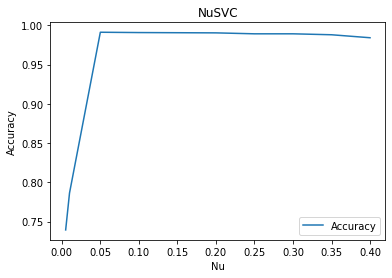

In [ ]:
plt.plot(nu, accuracy, label='Accuracy')
plt.legend(['Accuracy'], loc='lower right')
plt.xlabel('Nu')
plt.ylabel('Accuracy')
plt.title('NuSVC')
plt.show()